In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dsma-crisismmd/")
!pwd

/content/drive/MyDrive/dsma-crisismmd


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image


In [ ]:
data = pd.read_csv("./all_combined_data.csv")


### Preprocess tweets

### Display data examples

In [ ]:
# Function to display a few examples
def display_examples(data, num_examples=5, image_dir=""):
    # Randomly sample a few rows from the dataset
    samples = data.sample(n=num_examples)

    for _, row in samples.iterrows():
        text = row["tweet_text"]
        text_label = row["text_info"]
        image_label = row["image_info"]
        image_path = row["image_path"]
        manual_label = row["manual_label"]

        # Check if image exists
        if os.path.exists(image_path):
            image = Image.open(image_path)
        else:
            image = None

        # Create the plot
        plt.figure(figsize=(12, 4))

        # Display the image on the left
        if image:
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.axis("off")
            plt.title(f"Manual Label: {manual_label}")
        else:
            plt.subplot(1, 2, 1)
            plt.text(0.5, 0.5, "Image not found", fontsize=12, ha='center', va='center')
            plt.axis("off")

        # Display the text on the right
        plt.subplot(1, 2, 2)
        text_display = (
            f"**Tweet Text:**\n{text}\n\n"
            f"**Text Informativeness Label:** {text_label}\n"
            f"**Image Informativeness Label:** {image_label}"
        )
        plt.text(0, 0.5, text_display, fontsize=12, wrap=True, verticalalignment="center", family="monospace")
        plt.axis("off")

        # Adjust spacing and show the plot
        plt.tight_layout()
        plt.show()


# Call the function to display examples
# display_examples(data, num_examples=10, image_dir="./")


In [ ]:
data.head()

,tweet_id,image_id,text_info,image_info,tweet_text,image_path,processed_tweet_text,label,manual_label
0,9.177910e+17,917791044158185473_0,informative,informative,RT @Gizmodo: Wildfires raging through Northern...,data_image/california_wildfires/10_10_2017/917...,wildfires raging through northern california a...,Informative,informative
1,9.177911e+17,917791130590183424_0,informative,informative,PHOTOS: Deadly wildfires rage in California ht...,data_image/california_wildfires/10_10_2017/917...,photos: deadly wildfires rage in california,Informative,informative
2,9.177913e+17,917791291823591425_0,informative,informative,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,pls share: weâ€™re capturing wildfire response...,Informative,informative
3,9.177913e+17,917791291823591425_1,informative,not_informative,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,data_image/california_wildfires/10_10_2017/917...,pls share: weâ€™re capturing wildfire response...,Ambiguous,informative
4,9.177921e+17,917792092100988929_0,informative,informative,RT @TIME: California's raging wildfires as you...,data_image/california_wildfires/10_10_2017/917...,california's raging wildfires as you've never ...,Informative,informative


In [ ]:
# Load manually annotated data
df = pd.read_csv("./data_image/manually_annotated_data")
df['is_ambiguous'] = (df['label'] == "Ambiguous").astype(int)


In [ ]:
df_amb = df[df['is_ambiguous'] == 1]
df_not_amb = df[df['is_ambiguous'] == 0]

<ipython-input-5-1159571421>:44: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128546 (\N{CRYING FACE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


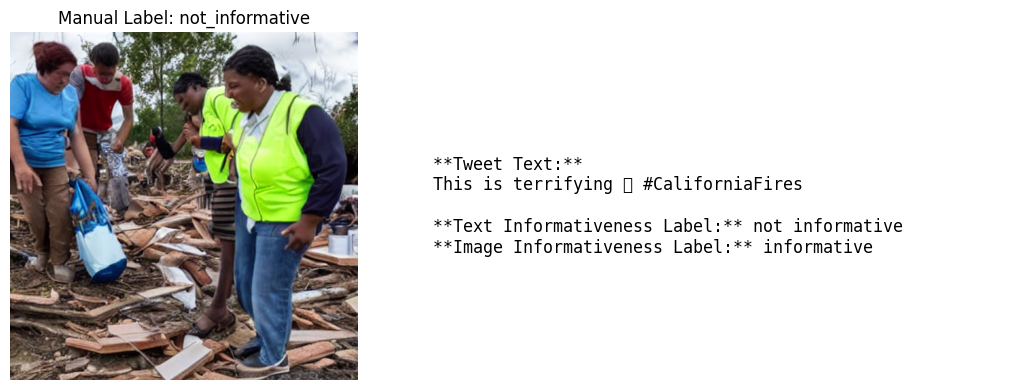

<ipython-input-5-1159571421>:44: UserWarning: Glyph 128549 (\N{DISAPPOINTED BUT RELIEVED FACE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128549 (\N{DISAPPOINTED BUT RELIEVED FACE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


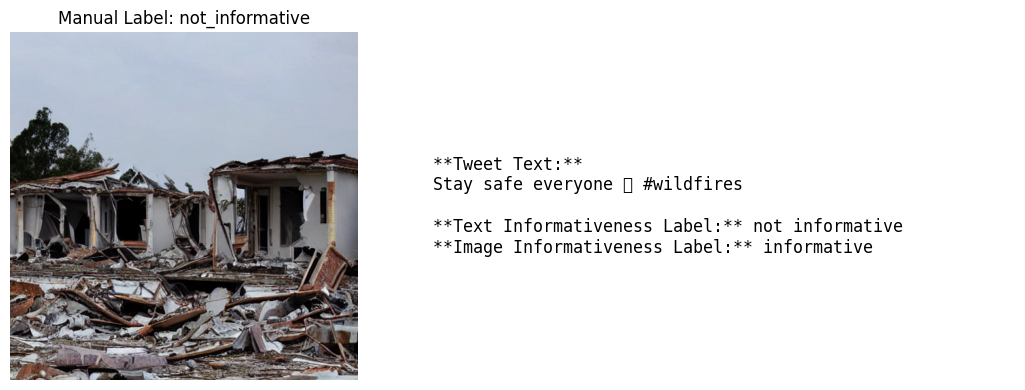

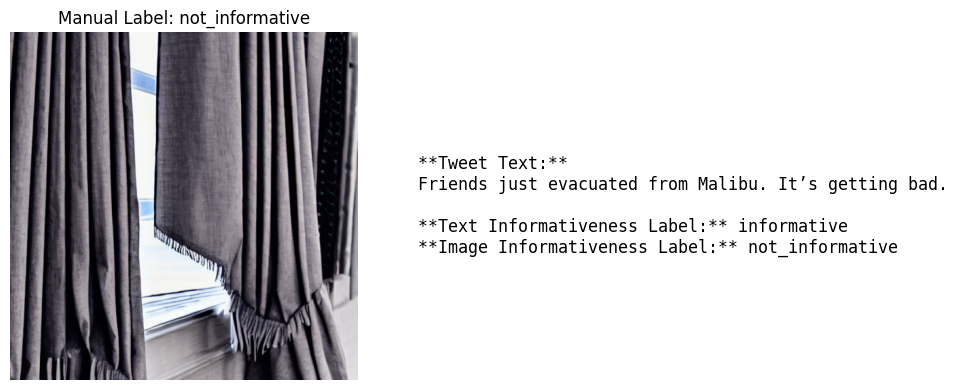

<ipython-input-5-1159571421>:44: UserWarning: Glyph 128557 (\N{LOUDLY CRYING FACE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128557 (\N{LOUDLY CRYING FACE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


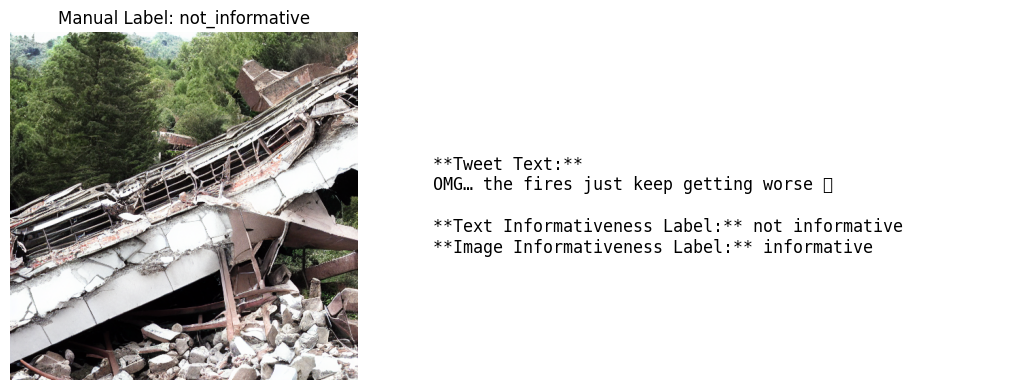

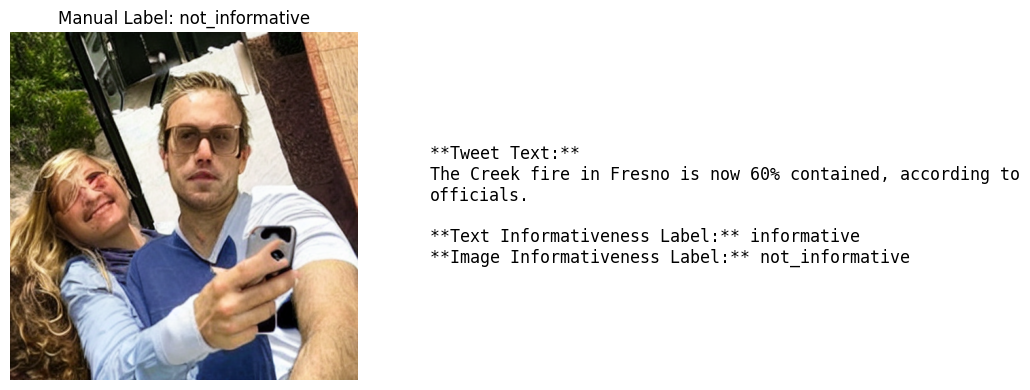

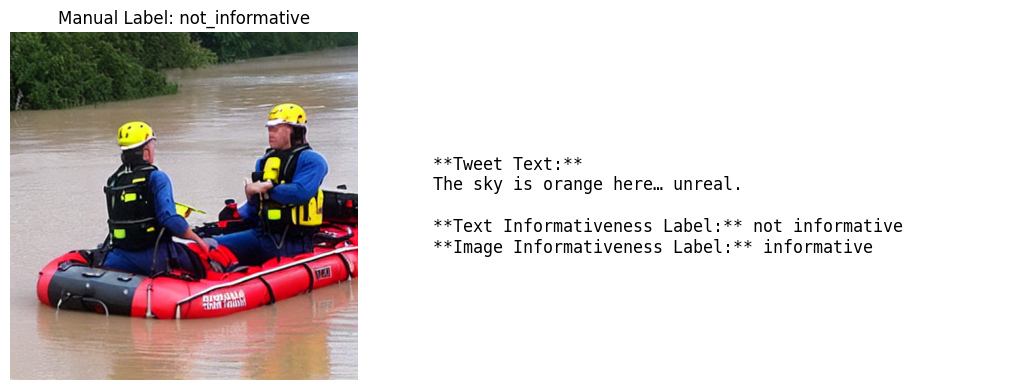

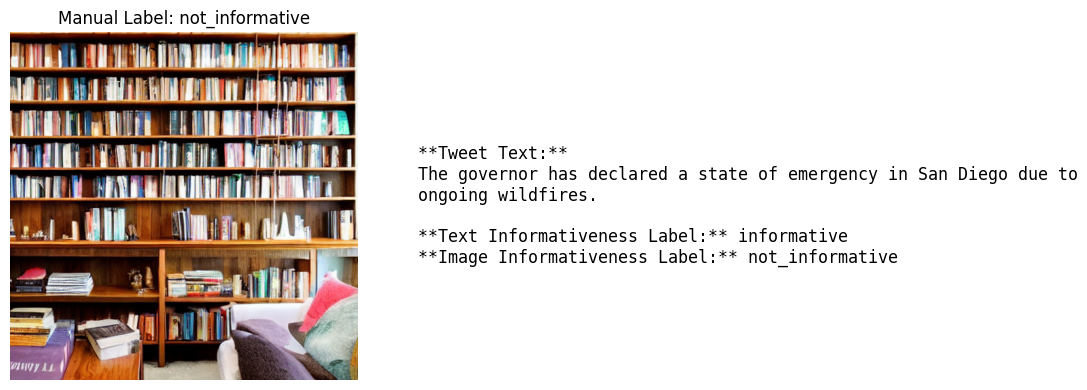

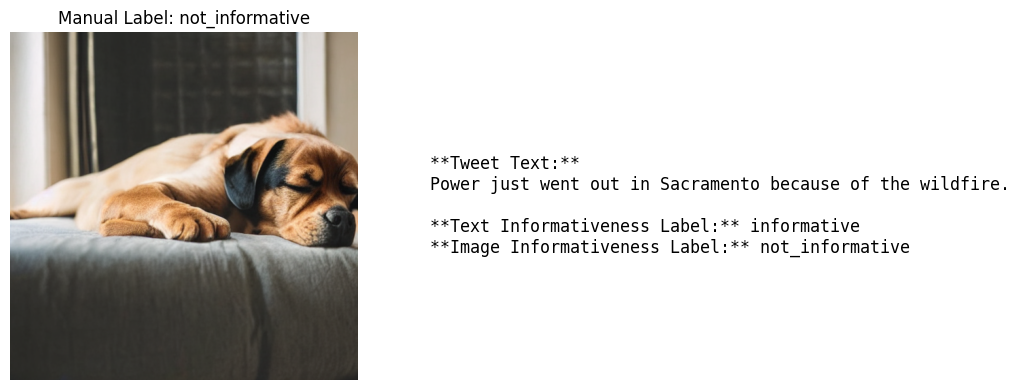

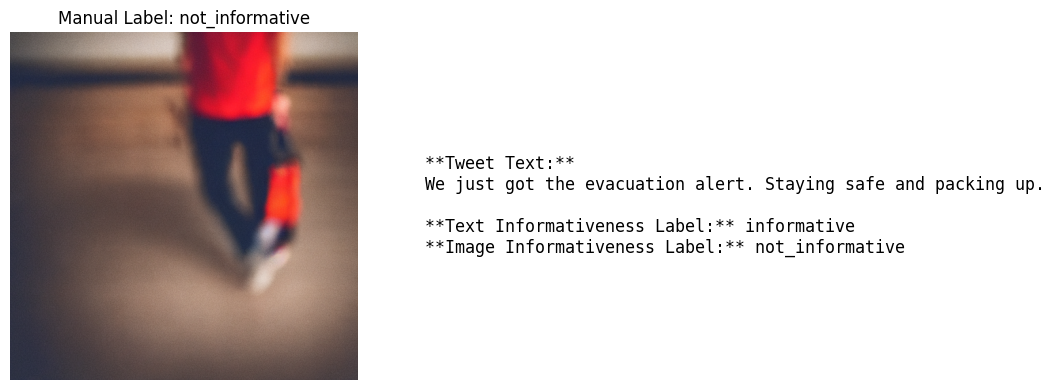

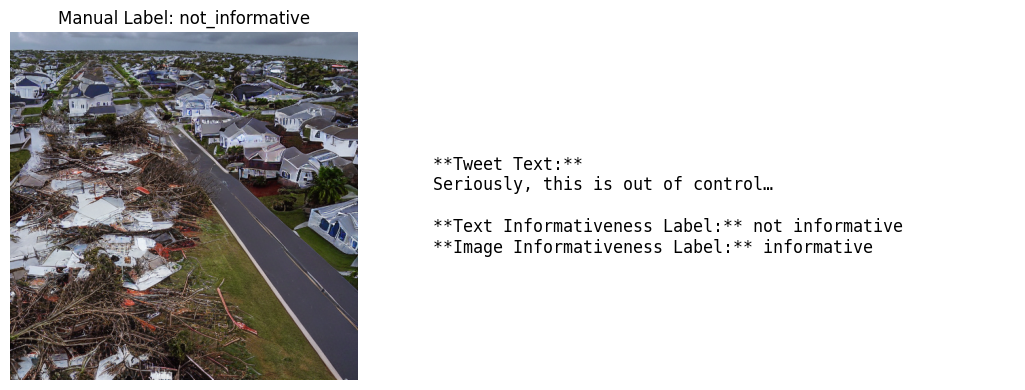

In [ ]:
display_examples(data[data["data_type"]=="synthetic"], num_examples=10, image_dir="./")


In [ ]:
data['data_type'] = data['tweet_id'].apply(lambda x: 'synthetic' if pd.isna(x) else 'real')

In [ ]:
data.tail()

,tweet_id,image_id,text_info,image_info,tweet_text,image_path,processed_tweet_text,label,manual_label,data_type
1684,NaN,NaN,not informative,informative,OMG… the fires just keep getting worse 😭,ambiguous_images/correct_info_image_45.png,omg… the fires just keep getting worse 😭,Ambiguous,not_informative,synthetic
1685,NaN,NaN,not informative,informative,Can’t believe what I’m seeing on the news…,ambiguous_images/correct_info_image_46.png,can’t believe what i’m seeing on the news…,Ambiguous,not_informative,synthetic
1686,NaN,NaN,not informative,informative,The sky is orange here… unreal.,ambiguous_images/correct_info_image_47.png,the sky is orange here… unreal.,Ambiguous,not_informative,synthetic
1687,NaN,NaN,not informative,informative,Stay safe everyone 😥 #wildfires,ambiguous_images/correct_info_image_48.png,stay safe everyone 😥 #wildfires,Ambiguous,not_informative,synthetic
1688,NaN,NaN,not informative,informative,Can’t believe what I’m seeing on the news…,ambiguous_images/correct_info_image_49.png,can’t believe what i’m seeing on the news…,Ambiguous,not_informative,synthetic


In [ ]:
data.to_csv("./all_combined_data.csv", index=False)